In [53]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
data_path = '/Users/Asus/Desktop/Unity Game/python\Data_Analysis/Machine_Learning_Python/IMDB'

df = pd.read_csv(os.path.join(data_path, 'IMDb movies.csv'), encoding='ISO-8859-1', error_bad_lines =False)
df.head()

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drÃ¸m,Den sorte drÃ¸m,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [29]:
durations = df[['duration']]
durations = durations.values
durations

array([[ 45],
       [ 70],
       [ 53],
       ...,
       [130],
       [ 98],
       [ 74]], dtype=int64)

In [34]:
scaler = StandardScaler()
scaler.fit_transform(durations.reshape(-1, 1))

array([[-2.45420385],
       [-1.34573909],
       [-2.09949512],
       ...,
       [ 1.31457632],
       [-0.10425856],
       [-1.16838473]])

# Elbow method

In [51]:
%%time
n_cluster = range(1, 21)
kmeans = [KMeans(n_clusters=i).fit(durations) for i in n_cluster]
scores = [kmeans[i].score(durations) for i in range(len(kmeans))]

Wall time: 20 s


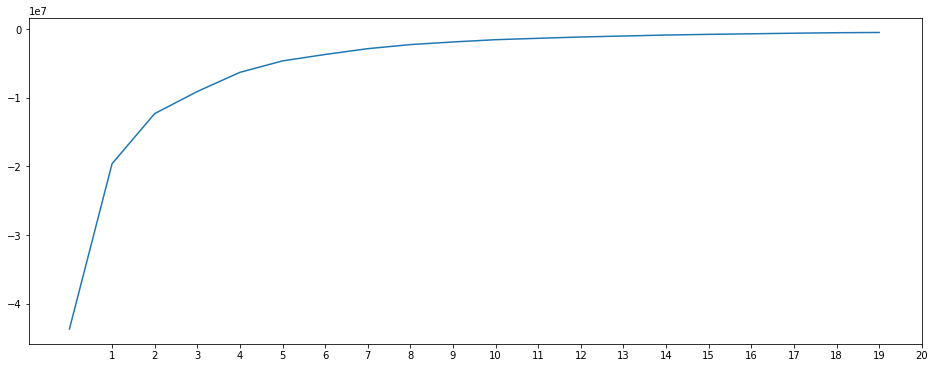

In [54]:
f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)

# Silhouette 

In [56]:
# take longer time to process
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4).fit_predict(durations)
print(silhouette_score(durations, kmeans))

0.5113291924185596


### Get the best number of clusters based on elbow method, where the difference between scores is smaller than 90% percentile 

In [83]:
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_cluster_selected = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
n_cluster_selected

16

In [88]:
preds = KMeans(n_clusters = n_cluster_selected).fit_predict(durations)
preds

array([10,  5, 10, ...,  7,  9,  5])

In [172]:
()

85855

Wall time: 33 ms


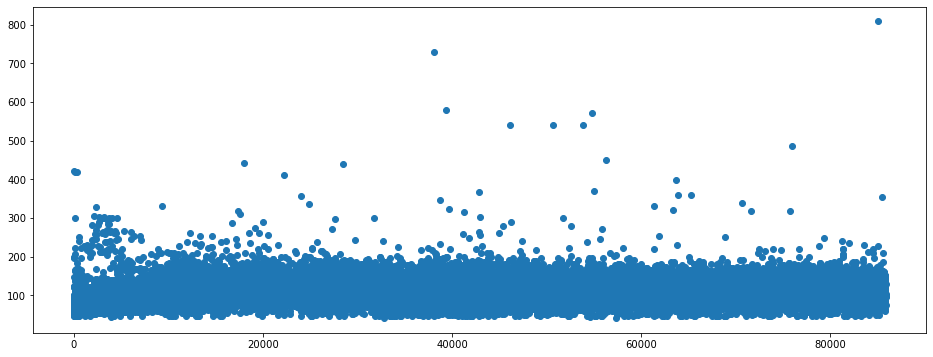

In [202]:
%%time
plt.figure(figsize = (16, 6))
plt.scatter(df.index, df.duration)

In [196]:
df.duration

0         45
1         70
2         53
3        100
4         68
        ... 
85850     95
85851    103
85852    130
85853     98
85854     74
Name: duration, Length: 85855, dtype: int64

In [108]:
df.cluster.value_counts()

1     17468
9     15841
4     13412
13    10112
0      7732
15     5173
5      4484
7      3772
2      2989
10     2129
11     1871
6       654
12      153
3        49
14       14
8         2
Name: cluster, dtype: int64

In [118]:
df['cluster'] = preds

outliers = [x for x in zip(df.cluster.value_counts().iloc[-2:].index, df.cluster.value_counts().iloc[-2:].values)]
outliers

[(14, 14), (8, 2)]

In [138]:
# get only category that contain number of observations that in the lower of quantile 1%

clusters = [x[0] for x in outliers if x[1] < np.quantile(df.cluster.value_counts().values, 0.01)]
clusters

[8]

In [145]:
for c in clusters:
    print(df[df.cluster == c][['duration']])

       duration
38038       729
85057       808


In [148]:
df.duration.describe()

count    85855.000000
mean       100.351418
std         22.553848
min         41.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        808.000000
Name: duration, dtype: float64

<AxesSubplot:>

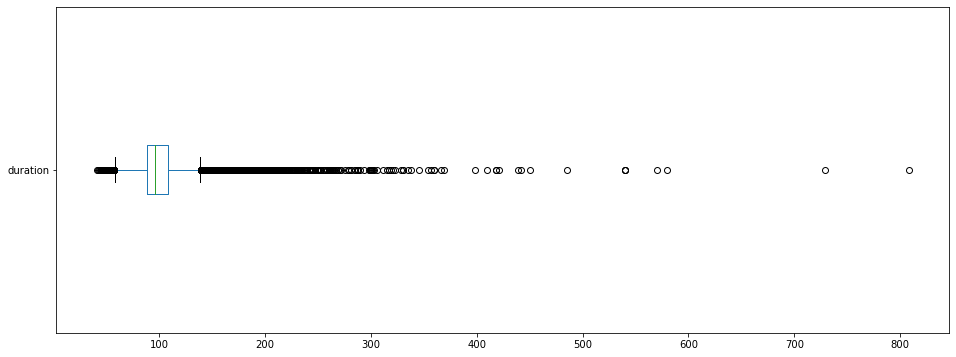

In [177]:
df.duration.plot(kind='box', vert=False, figsize=(16,6))

In [284]:
features = ['duration', 'year', 'votes', 'reviews_from_users']
mul_data = df[features]
mul_data =  mul_data.fillna(mul_data.median())

In [285]:
mul_data[mul_data.year == 'TV Movie 2019']

,duration,year,votes,reviews_from_users
83917,108,TV Movie 2019,23973,135.0


In [286]:
mul_data = mul_data[mul_data.year != 'TV Movie 2019']
mul_data = mul_data.values
mul_data

array([[45, 1894, 154, 1.0],
       [70, 1906, 589, 7.0],
       [53, 1911, 188, 5.0],
       ...,
       [130, '2019', 265, 9.0],
       [98, '2019', 194, 9.0],
       [74, '2019', 102, 9.0]], dtype=object)

In [287]:
mul_data = scaler.fit_transform(mul_data)
mul_data

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.45418725, -4.10883347, -0.17432453, -0.2445741 ],
       [-1.3457282 , -3.61329873, -0.16620497, -0.20943595],
       [-2.09948035, -3.40682592, -0.1736899 , -0.22114866],
       ...,
       [ 1.3145735 ,  1.05298681, -0.17225264, -0.19772323],
       [-0.10425408,  1.05298681, -0.1735779 , -0.19772323],
       [-1.16837476,  1.05298681, -0.17529514, -0.19772323]])

Wall time: 53 s


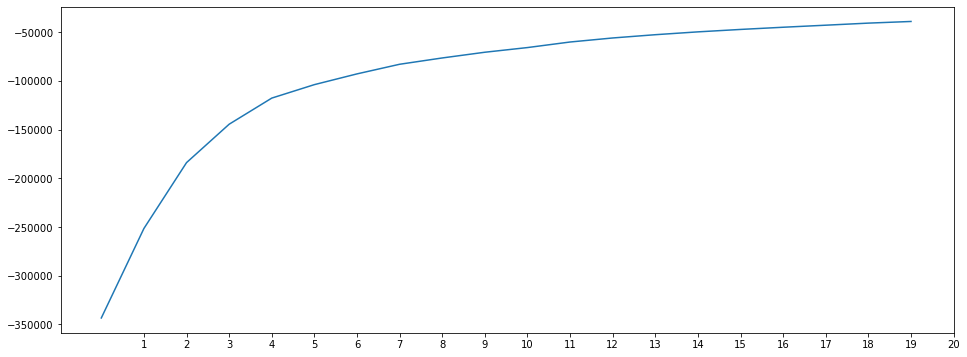

In [288]:
%%time
n_cluster = range(1, 21)
kmeans = [KMeans(n_clusters=i).fit(mul_data) for i in n_cluster]
scores = [kmeans[i].score(mul_data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)